https://github.com/ageron/handson-ml2/blob/master/17_autoencoders_and_gans.ipynb
https://www.kaggle.com/kvpratama/pokemon-images-dataset

In [1]:
import tensorflow as tf
import numpy as np
import os

%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import itertools
from tensorflow import keras

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.version.VERSION
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Importing the data as a tf.BatchDataset

In [4]:
base_dir = os.path.join(os.getcwd(), os.pardir, "pokemon_jpg")

In [5]:
pokemon_pictures = os.listdir(os.path.join(base_dir, "pokemon_jpg"))
print(pokemon_pictures[:10])

['1.jpg', '10.jpg', '100.jpg', '101.jpg', '102.jpg', '103.jpg', '104.jpg', '105.jpg', '106.jpg', '107.jpg']


In [6]:
print("Dataset contains " + str(len(pokemon_pictures)) + " pictures")

Dataset contains 819 pictures


In [7]:
pokemon_dataset = tf.keras.preprocessing.image_dataset_from_directory(base_dir, batch_size = 20, label_mode=None, 
                                                                      image_size=(128, 128) )

Found 819 files belonging to 1 classes.


In [8]:
type(pokemon_dataset)

tensorflow.python.data.ops.dataset_ops.BatchDataset

## Importing the data as an array

In [12]:
# still need to divide the pixel intensity by 255
from PIL import ImageOps, Image
size = 64, 64
#big_arr = np.array(64, 64, 3)
for f in os.listdir(os.path.join(base_dir, "pokemon_jpg")):
    im = Image.open(os.path.join(base_dir, "pokemon_jpg", f)).resize(size, Image.ANTIALIAS)
    break

big_arr = np.array([np.array(im)]).reshape(1, 64, 64, 3)
for f in os.listdir(os.path.join(base_dir,"pokemon_jpg"))[1:]:
    big_arr = np.append(big_arr, [np.array(Image.open(os.path.join(base_dir, "pokemon_jpg", f)).resize(size, Image.ANTIALIAS)).reshape(64, 64, 3)], axis=0)
    #i+=1
    
big_arr = big_arr/255

In [13]:
x_train = big_arr[:600]
x_test = big_arr[600:800]

In [14]:
x_train.shape

(600, 64, 64, 3)

In [15]:
x_test.shape

(200, 64, 64, 3)

In [16]:
big_arr.shape

(819, 64, 64, 3)

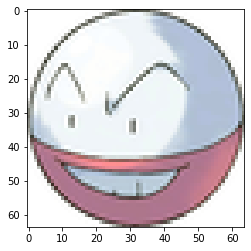

In [17]:
plt.imshow(big_arr[3])

In [18]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [19]:
x_train.shape

(600, 12288)

In [20]:
big_arr2 = big_arr
big_arr3 = big_arr2.reshape((len(big_arr2), np.prod(big_arr2.shape[1:])))

In [21]:
big_arr3.shape

(819, 12288)

I can take an unlabeled dataset and frame it as a supervised learning problem tasked with outputting x, a reconstruction of the original input x. This network can be trained by minimizing the reconstruction error, L(x, x^, which measures the differences between the original input and the consequent reconstruction. A bottleneck constrains the amount of information that can traverse the full network, forcing a learned compression of the input data. https://www.jeremyjordan.me/autoencoders/

In [63]:
# https://blog.keras.io/building-autoencoders-in-keras.html
from tensorflow.keras import regularizers
input_shape = 64*64*3
#encoding_dim = 100

input_img = keras.Input(shape=(input_shape,))
encoded = keras.layers.Dense(64, activation='relu')(input_img)
encoded = keras.layers.Dense(32, activation='relu')(encoded)

decoded = keras.layers.Dense(64, activation='relu')(encoded)
decoded2 = keras.layers.Dense(input_shape, activation='sigmoid')(decoded)

# model which maps input with reconstruction
autoencoder = keras.Model(input_img, decoded2)

In [74]:
autoencoder.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 12288)]           0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                786496    
_________________________________________________________________
dense_11 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_12 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_13 (Dense)             (None, 12288)             798720    
Total params: 1,589,408
Trainable params: 1,589,408
Non-trainable params: 0
_________________________________________________________________


In [64]:
# separate encoder model
#encoder = keras.Model(input_img, encoded)

In [65]:
#decoder model
#encoded_input = keras.Input(shape=(32,))
# retrieve the last layer of the autoencoder model
#decoder_layer = autoencoder.layers[-2:]
# create the decoder model
#decoder = keras.Model(encoded_input, decoded, decoded2)
#autoencoder = keras.Model(input_img, decoded)

In [66]:
decoder_layer

In [67]:
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

In [68]:
# https://blog.keras.io/building-autoencoders-in-keras.html
autoencoder.fit(x_train, x_train, epochs=50, batch_size=10, shuffle=True, validation_data=(x_test, x_test), verbose=10)

Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50


In [70]:
decoded_imgs = autoencoder.predict(x_test)

In [71]:
decoded_imgs.shape

(200, 12288)

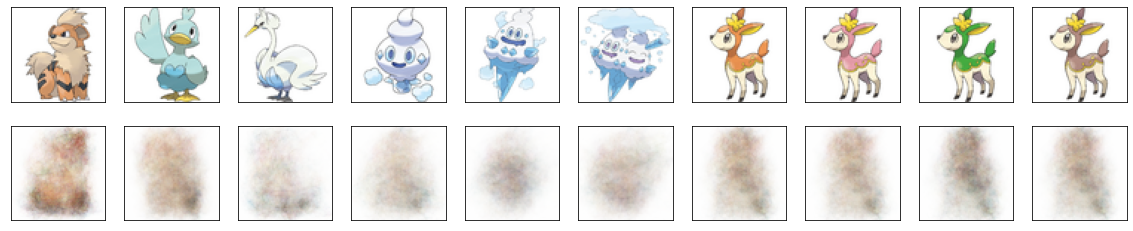

In [72]:
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(64, 64, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(64, 64, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Convolutional Autoencoder

In [97]:
input_img = tf.keras.Input(shape=(64, 64, 3))

x = keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = keras.layers.MaxPooling2D((2, 2), padding='same')(x)

x = keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = keras.layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [98]:
autoencoder.summary()

Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 8)         1160      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 8)         584       
_________________________________________________________________
up_sampling2d_4 (UpSampling2 (None, 32, 32, 8)         0  

In [99]:
x_train = big_arr[:600]
x_test = big_arr[600:800]

In [100]:
x_train.shape

(600, 64, 64, 3)

In [101]:
x_test.shape

(200, 64, 64, 3)

In [102]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
import datetime

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [103]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [104]:
autoencoder.fit(x_train, x_train,
               epochs=50,
               batch_size=128,
               shuffle=True,
               validation_data=(x_test, x_test),
               callbacks=[tensorboard_callback])

Epoch 1/50
5/5 [==============================] - 6s 155ms/step - loss: 0.6914 - val_loss: 0.6475
Epoch 2/50
5/5 [==============================] - 0s 28ms/step - loss: 0.6252 - val_loss: 0.5233
Epoch 3/50
5/5 [==============================] - 0s 28ms/step - loss: 0.5099 - val_loss: 0.4701
Epoch 4/50
5/5 [==============================] - 0s 27ms/step - loss: 0.4931 - val_loss: 0.4634
Epoch 5/50
5/5 [==============================] - 0s 27ms/step - loss: 0.4753 - val_loss: 0.4422
Epoch 6/50
5/5 [==============================] - 0s 27ms/step - loss: 0.4559 - val_loss: 0.4426
Epoch 7/50
5/5 [==============================] - 0s 28ms/step - loss: 0.4528 - val_loss: 0.4259
Epoch 8/50
5/5 [==============================] - 0s 27ms/step - loss: 0.4412 - val_loss: 0.4142
Epoch 9/50
5/5 [==============================] - 0s 27ms/step - loss: 0.4277 - val_loss: 0.4025
Epoch 10/50
5/5 [==============================] - 0s 27ms/step - loss: 0.4115 - val_loss: 0.3863
Epoch 11/50
5/5 [===========

In [106]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 10124), started 0:00:59 ago. (Use '!kill 10124' to kill it.)

In [107]:
decoded_imgs = autoencoder.predict(x_test)

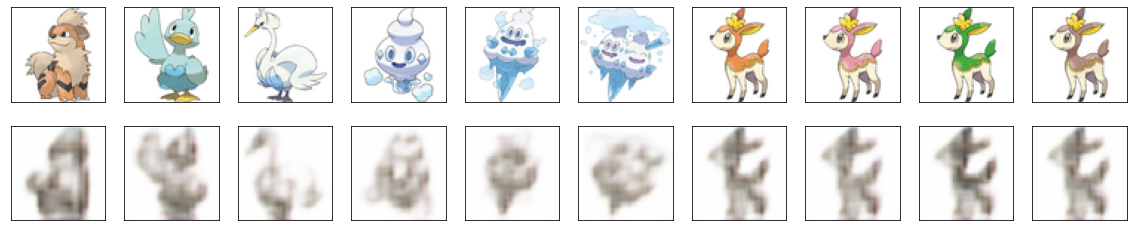

In [108]:
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(64, 64, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(64, 64, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [115]:
stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation = "selu", input_shape=[30]),
    keras.layers.Dense(64 * 64 * 3, activation="sigmoid"),
    keras.layers.Reshape([64, 64, 3])
])

In [119]:
ae = keras.models.Sequential([stacked_encoder, stacked_decoder])
ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(lr=1.0), metrics=['accuracy'])
history = ae.fit(big_arr)

ValueError: in user code:

    C:\Users\lhm\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\Users\lhm\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\lhm\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\lhm\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\lhm\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\lhm\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\Users\lhm\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:757 train_step
        self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    C:\Users\lhm\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:498 minimize
        return self.apply_gradients(grads_and_vars, name=name)
    C:\Users\lhm\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:598 apply_gradients
        grads_and_vars = optimizer_utils.filter_empty_gradients(grads_and_vars)
    C:\Users\lhm\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\optimizer_v2\utils.py:78 filter_empty_gradients
        raise ValueError("No gradients provided for any variable: %s." %

    ValueError: No gradients provided for any variable: ['dense_2/kernel:0', 'dense_2/bias:0', 'dense_3/kernel:0', 'dense_3/bias:0', 'dense_4/kernel:0', 'dense_4/bias:0', 'dense_5/kernel:0', 'dense_5/bias:0'].


In [110]:
big_arr.shape

(819, 64, 64, 3)

In [97]:
im3 = im2.reshape(1, 64, 64, 3)

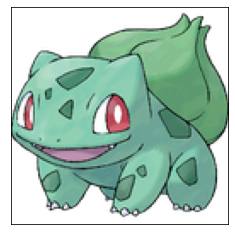

In [74]:
plt.imshow(im)
plt.xticks([])
plt.yticks([])
plt.show()

In [68]:
type(im)

PIL.Image.Image

In [69]:
type(pokemon_dataset)

tensorflow.python.data.ops.dataset_ops.BatchDataset

## View Images

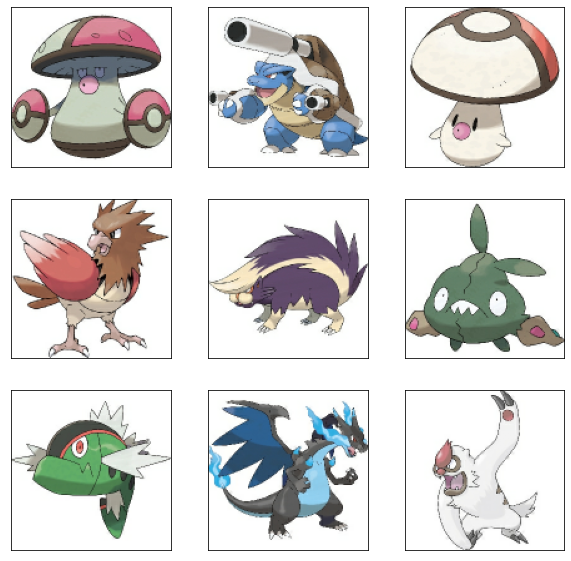

In [113]:
plt.figure(figsize=(10, 10))

for images in pokemon_dataset.take(1):
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i]/255)
        plt.xticks([])
        plt.yticks([])

In [54]:
stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[128, 128]),
    keras.layers.Dense(100, activation = "selu"),
    keras.layers.Dense(30, activation = "selu")
])

In [ ]:
stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation = "selu", input_shape=[30]),
    keras.layers.Dense(128*128, activation="sigmoid"),
    keras.layers.Reshape([128, 128])
])